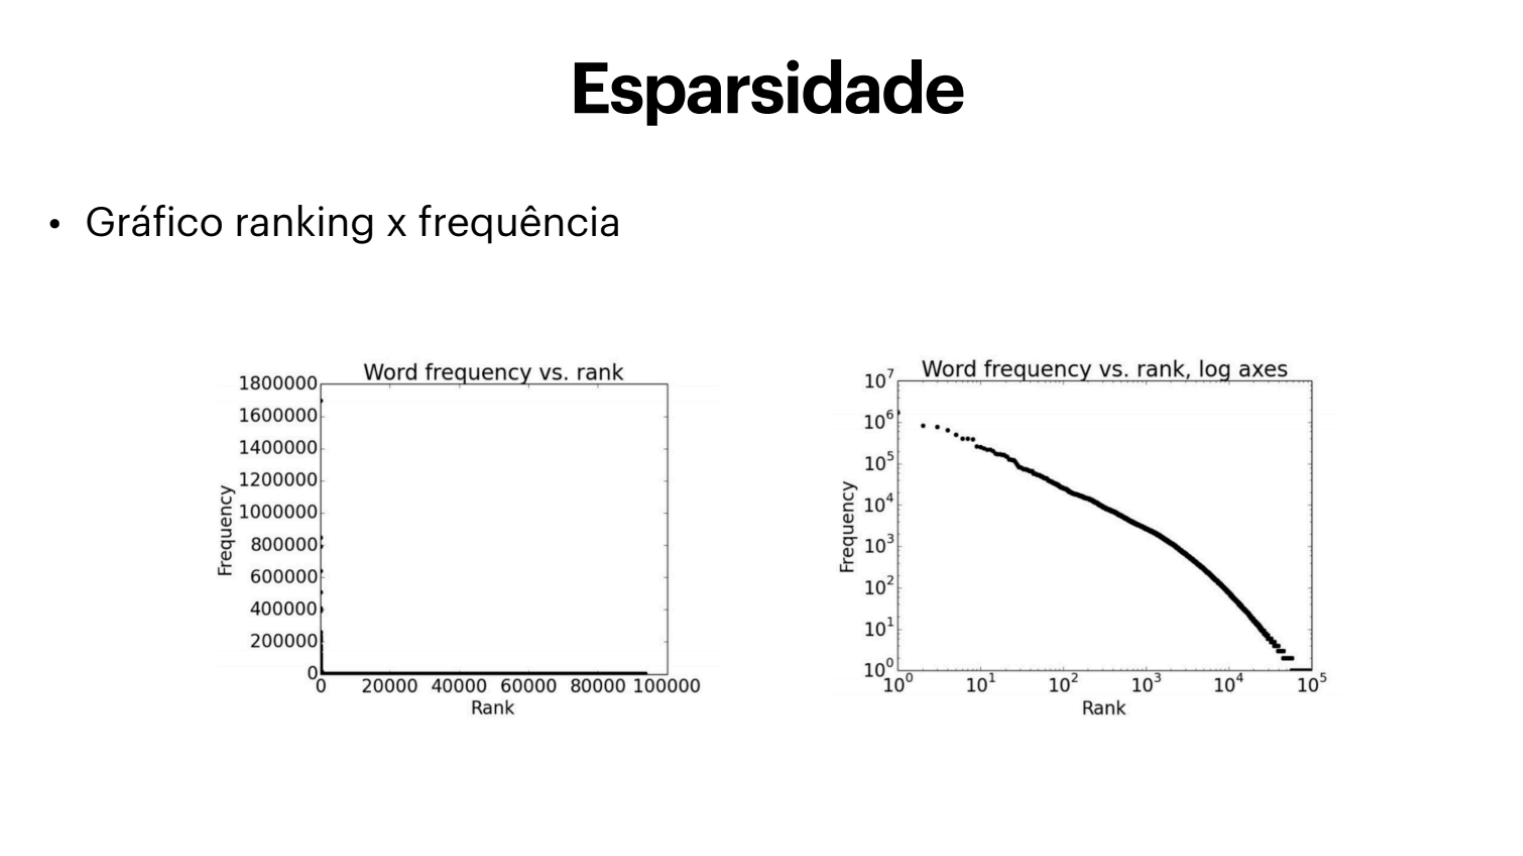

In [1]:
import pandas as pd

In [5]:
with open("machado.txt", "r", encoding="utf-8") as f:
    text = f.read()

In [9]:
print(text[:500])

# RESSUREIÇÃO
## CAPÍTULO PRIMEIRO / NO DIA DE ANO BOM

Naquele dia, — já lá vão dez anos! — o Dr. Félix levantou-se tarde, abriu a janela e cumprimentou o sol. O dia estava esplêndido; uma fresca bafagem do mar vinha quebrar um pouco os ardores do estio; algumas raras nuvenzinhas brancas, finas e transparentes se destacavam no azul do céu. Chilreavam na chácara vizinha à casa do doutor algumas aves afeitas à vida semi-urbana, semi-silvestre que lhes pode oferecer uma chácara nas Laranjeiras. Pa


In [10]:
data = text.split()
data

['#',
 'RESSUREIÇÃO',
 '##',
 'CAPÍTULO',
 'PRIMEIRO',
 '/',
 'NO',
 'DIA',
 'DE',
 'ANO',
 'BOM',
 'Naquele',
 'dia,',
 '—',
 'já',
 'lá',
 'vão',
 'dez',
 'anos!',
 '—',
 'o',
 'Dr.',
 'Félix',
 'levantou-se',
 'tarde,',
 'abriu',
 'a',
 'janela',
 'e',
 'cumprimentou',
 'o',
 'sol.',
 'O',
 'dia',
 'estava',
 'esplêndido;',
 'uma',
 'fresca',
 'bafagem',
 'do',
 'mar',
 'vinha',
 'quebrar',
 'um',
 'pouco',
 'os',
 'ardores',
 'do',
 'estio;',
 'algumas',
 'raras',
 'nuvenzinhas',
 'brancas,',
 'finas',
 'e',
 'transparentes',
 'se',
 'destacavam',
 'no',
 'azul',
 'do',
 'céu.',
 'Chilreavam',
 'na',
 'chácara',
 'vizinha',
 'à',
 'casa',
 'do',
 'doutor',
 'algumas',
 'aves',
 'afeitas',
 'à',
 'vida',
 'semi-urbana,',
 'semi-silvestre',
 'que',
 'lhes',
 'pode',
 'oferecer',
 'uma',
 'chácara',
 'nas',
 'Laranjeiras.',
 'Parecia',
 'que',
 'toda',
 'a',
 'natureza',
 'colaborava',
 'na',
 'inauguração',
 'do',
 'ano.',
 'Aqueles',
 'para',
 'quem',
 'a',
 'idade',
 'já',
 'desfez

In [11]:
from collections import Counter

word_counts = Counter(data)
word_counts.most_common(10)

[('a', 20197),
 ('que', 19008),
 ('de', 16978),
 ('e', 15355),
 ('o', 13459),
 ('não', 8240),
 ('—', 7679),
 ('um', 5902),
 ('da', 5827),
 ('do', 5826)]

In [12]:
from unidecode import unidecode

data_normalized = [unidecode(word.lower()) for word in data]
word_counts_normalized = Counter(data_normalized)
word_counts_normalized.most_common(10)

[('a', 25038),
 ('e', 20155),
 ('que', 19549),
 ('de', 17296),
 ('o', 14975),
 ('nao', 10454),
 ('--', 7679),
 ('um', 6267),
 ('da', 5974),
 ('do', 5875)]

In [13]:
# remove characters that are not alphabetic or numeric
# without regex
data_cleaned = []
for word in data_normalized:
    cleaned_word = ''.join(char for char in word if char.isalnum())
    if cleaned_word:
        data_cleaned.append(cleaned_word)
word_counts_cleaned = Counter(data_cleaned)
word_counts_cleaned.most_common(10)

[('a', 25079),
 ('e', 20755),
 ('que', 20214),
 ('de', 17307),
 ('o', 14995),
 ('nao', 11142),
 ('um', 6333),
 ('da', 5980),
 ('do', 5879),
 ('os', 4852)]

In [24]:
sorted_word_counts = sorted(
    word_counts_cleaned.items(),
    key=lambda item: item[1],
    reverse=True
)

ranked_word_counts = []
for i, (word, count) in enumerate(sorted_word_counts):
    ranked_word_counts.append((word, count, i + 1))

ranked_word_counts

[('a', 25079, 1),
 ('e', 20755, 2),
 ('que', 20214, 3),
 ('de', 17307, 4),
 ('o', 14995, 5),
 ('nao', 11142, 6),
 ('um', 6333, 7),
 ('da', 5980, 8),
 ('do', 5879, 9),
 ('os', 4852, 10),
 ('com', 4628, 11),
 ('as', 4417, 12),
 ('se', 4392, 13),
 ('era', 4246, 14),
 ('mas', 4196, 15),
 ('uma', 4098, 16),
 ('para', 4066, 17),
 ('em', 3727, 18),
 ('ao', 3208, 19),
 ('lhe', 2758, 20),
 ('por', 2645, 21),
 ('mais', 2571, 22),
 ('no', 2546, 23),
 ('ele', 2476, 24),
 ('na', 2390, 25),
 ('eu', 2317, 26),
 ('como', 2279, 27),
 ('ou', 2048, 28),
 ('me', 2048, 29),
 ('ela', 2027, 30),
 ('foi', 1878, 31),
 ('nem', 1621, 32),
 ('dos', 1475, 33),
 ('disse', 1430, 34),
 ('quando', 1370, 35),
 ('sem', 1351, 36),
 ('depois', 1248, 37),
 ('casa', 1236, 38),
 ('olhos', 1235, 39),
 ('esta', 1226, 40),
 ('ja', 1190, 41),
 ('tudo', 1144, 42),
 ('ainda', 1132, 43),
 ('ser', 1132, 44),
 ('tinha', 1109, 45),
 ('das', 1103, 46),
 ('so', 1098, 47),
 ('muito', 1093, 48),
 ('nada', 1077, 49),
 ('tambem', 1063, 50),

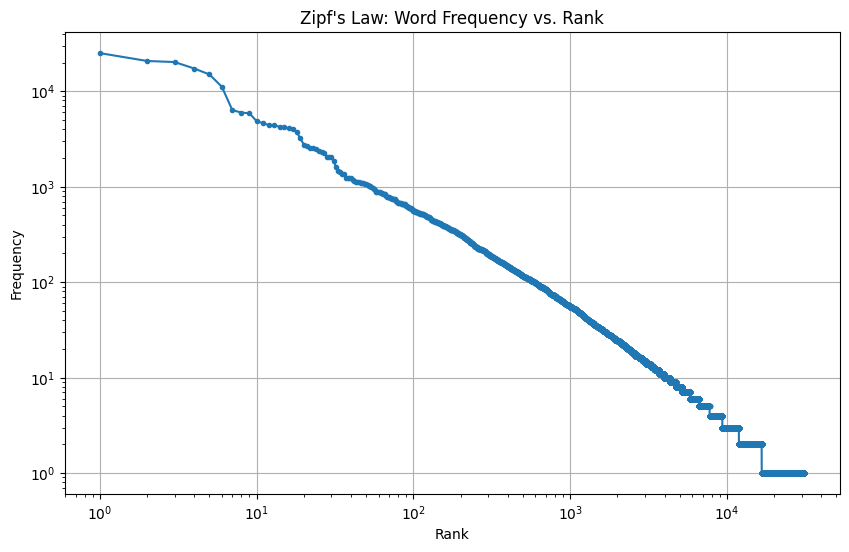

In [25]:
import matplotlib.pyplot as plt

ranks = [rank for word, count, rank in ranked_word_counts]
frequencies = [count for word, count, rank in ranked_word_counts]

plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf's Law: Word Frequency vs. Rank")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()